In [20]:
import pandas as pd
import numpy as np

df = pd.read_csv('ais.csv')

df.head()

rcc  wcc    hc    hg  ferr    bmi    ssf  pcBfat    lbm     ht    wt sex  \
0  3.96  7.5  37.5  12.3    60  20.56  109.1   19.75  63.32  195.9  78.9   f   
1  4.41  8.3  38.2  12.7    68  20.67  102.8   21.30  58.55  189.7  74.4   f   
2  4.14  5.0  36.4  11.6    21  21.86  104.6   19.88  55.36  177.8  69.1   f   
3  4.11  5.3  37.3  12.6    69  21.88  126.4   23.66  57.18  185.0  74.9   f   
4  4.45  6.8  41.5  14.0    29  18.96   80.3   17.64  53.20  184.6  64.6   f   

    sport  
0  B_Ball  
1  B_Ball  
2  B_Ball  
3  B_Ball  
4  B_Ball

# 2. Evaluate the variables

In [4]:
print(len(df['sport'].unique()))
print(len(df['sex'].unique()))

10
2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   rcc     202 non-null    float64
 1   wcc     202 non-null    float64
 2   hc      202 non-null    float64
 3   hg      202 non-null    float64
 4   ferr    202 non-null    int64  
 5   bmi     202 non-null    float64
 6   ssf     202 non-null    float64
 7   pcBfat  202 non-null    float64
 8   lbm     202 non-null    float64
 9   ht      202 non-null    float64
 10  wt      202 non-null    float64
 11  sex     202 non-null    object 
 12  sport   202 non-null    object 
dtypes: float64(10), int64(1), object(2)
memory usage: 20.6+ KB


In [8]:
df.describe()

rcc         wcc          hc          hg        ferr         bmi  \
count  202.000000  202.000000  202.000000  202.000000  202.000000  202.000000   
mean     4.718614    7.108911   43.091584   14.566337   76.876238   22.955891   
std      0.457976    1.800337    3.662989    1.362451   47.501239    2.863933   
min      3.800000    3.300000   35.900000   11.600000    8.000000   16.750000   
25%      4.372500    5.900000   40.600000   13.500000   41.250000   21.082500   
50%      4.755000    6.850000   43.500000   14.700000   65.500000   22.720000   
75%      5.030000    8.275000   45.575000   15.575000   97.000000   24.465000   
max      6.720000   14.300000   59.700000   19.200000  234.000000   34.420000   

              ssf      pcBfat         lbm          ht          wt  
count  202.000000  202.000000  202.000000  202.000000  202.000000  
mean    69.021782   13.507426   64.873713  180.103960   75.007921  
std     32.565333    6.189826   13.070197    9.734494   13.925199  
min     28.000000    5.630000   34.360000  148.900000   37.800000  
25%     43.850000    8.545000   54.667500  174.000000   66.525000  
50%     58.600000   11.650000   63.035000  179.700000   74.400000  
75%     90.350000   18.080000   74.750000  186.175000   84.125000  
max    200.800000   35.520000  106.000000  209.400000  123.200000

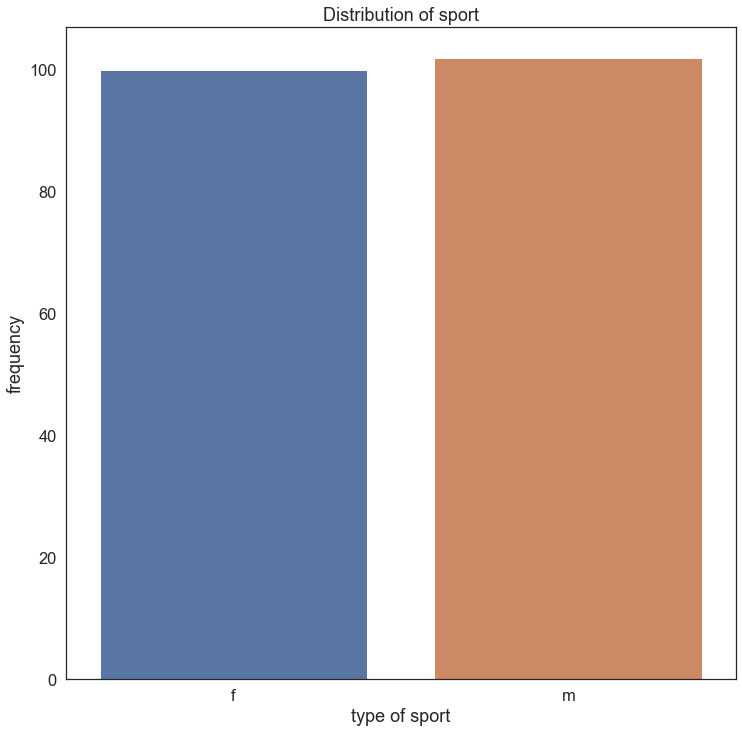

In [7]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,12))
ax = sns.countplot(x='sex', data= df)
sns.set(font_scale=1.5)
sns.set_style('white')

plt.title('Distribution of sport')
plt.xlabel('type of sport')
plt.ylabel('frequency')

# [4] Annotate the bars with values:
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50), va='center') 


# 4. Specify the target variable

In [21]:
X = df
y = df['sex']

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

X['sport']= le.fit_transform(df['sport'])
X['sex']= le.fit_transform(df['sex'])


y = le.transform(y)


In [23]:
X.info()
X.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   rcc     202 non-null    float64
 1   wcc     202 non-null    float64
 2   hc      202 non-null    float64
 3   hg      202 non-null    float64
 4   ferr    202 non-null    int64  
 5   bmi     202 non-null    float64
 6   ssf     202 non-null    float64
 7   pcBfat  202 non-null    float64
 8   lbm     202 non-null    float64
 9   ht      202 non-null    float64
 10  wt      202 non-null    float64
 11  sex     202 non-null    int64  
 12  sport   202 non-null    int64  
dtypes: float64(10), int64(3)
memory usage: 20.6 KB


rcc  wcc    hc    hg  ferr    bmi    ssf  pcBfat    lbm     ht    wt  sex  \
0  3.96  7.5  37.5  12.3    60  20.56  109.1   19.75  63.32  195.9  78.9    0   
1  4.41  8.3  38.2  12.7    68  20.67  102.8   21.30  58.55  189.7  74.4    0   
2  4.14  5.0  36.4  11.6    21  21.86  104.6   19.88  55.36  177.8  69.1    0   
3  4.11  5.3  37.3  12.6    69  21.88  126.4   23.66  57.18  185.0  74.9    0   
4  4.45  6.8  41.5  14.0    29  18.96   80.3   17.64  53.20  184.6  64.6    0   

   sport  
0      0  
1      0  
2      0  
3      0  
4      0

# 5. Normalise the data set

In [24]:
x_cols = X.columns

from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()

X = ms.fit_transform(X)

X = pd.DataFrame(X, columns=[x_cols])

X.head()

rcc       wcc        hc        hg      ferr       bmi       ssf  \
0  0.054795  0.381818  0.067227  0.092105  0.230088  0.215620  0.469329   
1  0.208904  0.454545  0.096639  0.144737  0.265487  0.221845  0.432870   
2  0.116438  0.154545  0.021008  0.000000  0.057522  0.289191  0.443287   
3  0.106164  0.181818  0.058824  0.131579  0.269912  0.290323  0.569444   
4  0.222603  0.318182  0.235294  0.315789  0.092920  0.125071  0.302662   

     pcBfat       lbm        ht        wt  sex sport  
0  0.472399  0.404243  0.776860  0.481265  0.0   0.0  
1  0.524256  0.337661  0.674380  0.428571  0.0   0.0  
2  0.476748  0.293132  0.477686  0.366511  0.0   0.0  
3  0.603212  0.318537  0.596694  0.434426  0.0   0.0  
4  0.401807  0.262982  0.590083  0.313817  0.0   0.0

# 6. Apply the clustering algorithm

In [25]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 2, random_state=0)

kmeans.fit(X)

/Users/hamdihassan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


KMeans(n_clusters=2, random_state=0)

In [26]:
kmeans.cluster_centers_

array([[ 4.20057749e-01,  3.56506239e-01,  4.09663866e-01,
         5.20123839e-01,  3.91159119e-01,  4.04845923e-01,
         1.35547159e-01,  1.21140259e-01,  5.62491105e-01,
         6.05055907e-01,  5.23694724e-01,  1.00000000e+00,
         5.52287582e-01],
       [ 2.07020548e-01,  3.35818182e-01,  1.92521008e-01,
         2.57894737e-01,  2.16637168e-01,  2.96502547e-01,
         3.41278935e-01,  4.08802275e-01,  2.86640145e-01,
         4.24694215e-01,  3.45925059e-01, -7.77156117e-16,
         4.07777778e-01]])

In [27]:
kmeans.inertia_

62.012692896805525

# 7. Evaluate the output

In [28]:
# [1] Extract the labels from the k means.
labels = kmeans.labels_

# [2] Add up correctly labelled instances. 

correct_labels = sum(y == labels)

# [3] Display the result.
print("Result: %a out of %a samples were correctly labeled."% (correct_labels, y.size))

print(' Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 0 out of 202 samples were correctly labeled.
 Accuracy score: 0.00


# 8. Improve the accuracy (elbow method)

In [29]:
cs = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',
                   max_iter=300, n_init = 10, random_state=0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1,11), cs)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

/Users/hamdihassan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/hamdihassan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/hamdihassan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/hamdihassan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised i

In [34]:
kmeans = KMeans(n_clusters=3, random_state=0)

kmeans.fit(X)

/Users/hamdihassan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

### 3 Clusters

In [35]:
labels = kmeans.labels_

correct_labels = sum(y == labels)

# [3] Display the result.
print("Result: %d out of %d samples were correctly labeled."% (correct_labels, y.size))

print(' Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 0 out of 202 samples were correctly labeled.
 Accuracy score: 0.00


In [44]:
kmeans = KMeans(n_clusters=4, random_state=0)

kmeans.fit(X)

/Users/hamdihassan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

### 4 Clusters

In [45]:
labels = kmeans.labels_

correct_labels = sum(y == labels)

# [3] Display the result.
print("Result: %d out of %d samples were correctly labeled."% (correct_labels, y.size))

print(' Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 125 out of 202 samples were correctly labeled.
 Accuracy score: 0.62


In [54]:
import seaborn as sns

sns.scatterplot(x = 'ht', y = 'wt',data = df, c= labels)

<AxesSubplot:xlabel='ht', ylabel='wt'>

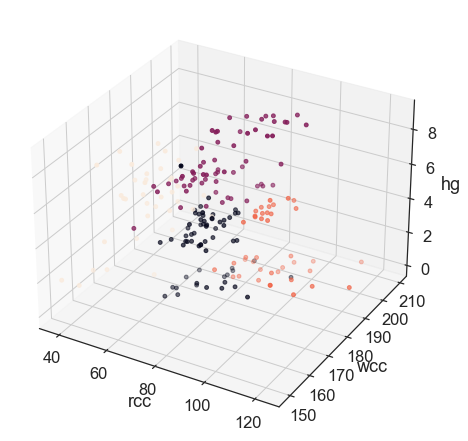

In [55]:
fig = plt.figure(figsize=(26, 26))
ax = fig.add_subplot(131, projection='3d')
                     #, projection='2d')
ax.scatter(df['wt'], df['ht'], df['sport'], c=labels, s=15)
ax.set_xlabel('rcc')
ax.set_ylabel('wcc')
ax.set_zlabel('hg')
plt.show()